In [1]:
import pandas as pd
import glob

In [2]:
df = pd.concat(map(pd.read_csv, glob.glob('Subway_Data/*.txt')))


In [3]:
df.head()
df.groupby(['STATION','SCP']).count()


C/A  UNIT  LINENAME  DIVISION  DATE  TIME  DESC  ENTRIES  \
STATION   SCP                                                                  
1 AV      00-00-00  776   776       776       776   776   776   776      776   
          00-00-01  775   775       775       775   775   775   775      775   
          00-03-00  776   776       776       776   776   776   776      776   
          00-03-01  775   775       775       775   775   775   775      775   
          00-03-02  776   776       776       776   776   776   776      776   
...                 ...   ...       ...       ...   ...   ...   ...      ...   
ZEREGA AV 00-00-01  764   764       764       764   764   764   764      764   
          00-03-00  764   764       764       764   764   764   764      764   
          00-03-01  764   764       764       764   764   764   764      764   
          00-05-00  763   763       763       763   763   763   763      763   
          00-05-01  763   763       763       763   763   763   763      763   

                    EXITS                                                                 
STATION   SCP                                                                             
1 AV      00-00-00                                                776                     
          00-00-01                                                775                     
          00-03-00                                                776                     
          00-03-01                                                775                     
          00-03-02                                                776                     
...                                                               ...                     
ZEREGA AV 00-00-01                                                764                     
          00-03-00                                                764                     
          00-03-01                                                764                     
          00-05-00                                                763                     
          00-05-01                                                763                     

[4369 rows x 9 columns]

In [4]:
#df.dtypes 
#date and time stored as objects

In [5]:
df["UNIQUE TURNSTILE ID"] = df["C/A"] + df["UNIT"] + " " + df["STATION"] + " " + df["SCP"] #create id for each turnstile
df["DATETIME"] = pd.to_datetime(df["DATE"] + " " + df["TIME"]) #convert to datetime format


In [6]:
#rename column name
df.rename(columns={df.columns[10]: 'EXITS'}, inplace=True)

In [7]:
#filter division
df=df[(df["DIVISION"]=='BMT')|(df["DIVISION"]=='IND')|(df["DIVISION"]=='IRT')] #filter division

#drop unnecessary columns 
df.drop(["DATE", "TIME", "DESC", "DIVISION", "LINENAME", "C/A", "UNIT"], axis = 1, inplace = True)


In [8]:
df.head(2)

,SCP,STATION,ENTRIES,EXITS,UNIQUE TURNSTILE ID,DATETIME
0,02-00-00,59 ST,7183242,2433142,A002R051 59 ST 02-00-00,2019-08-31 00:00:00
1,02-00-00,59 ST,7183258,2433149,A002R051 59 ST 02-00-00,2019-08-31 04:00:00


In [9]:
df = df.sort_values(by="DATETIME") #sorted values by datetime 

In [10]:
df["DAY_OF_WEEK"] = df["DATETIME"].dt.day_name()
df.head()

,SCP,STATION,ENTRIES,EXITS,UNIQUE TURNSTILE ID,DATETIME,DAY_OF_WEEK
190621,00-00-01,34 ST-HUDSON YD,46091,423786,R550R072 34 ST-HUDSON YD 00-00-01,2019-05-25,Saturday
90454,02-06-02,COURT SQ,560,0,N400AR359 COURT SQ 02-06-02,2019-05-25,Saturday
46327,00-05-00,125 ST,458753,0,N026R102 125 ST 00-05-00,2019-05-25,Saturday
105645,00-00-00,18 AV,10287680,7903273,N549R242 18 AV 00-00-00,2019-05-25,Saturday
133039,00-03-02,14 ST,11062322,7462249,R127R105 14 ST 00-03-02,2019-05-25,Saturday


In [11]:
#Station by volume
df_by_station = df.groupby(["STATION","SCP", pd.Grouper(key="DATETIME", freq = "D")]).agg({'ENTRIES': ['max'], "EXITS":["max"]})

df_by_station.reset_index(inplace=True)


df_by_station.columns = ['STATION','SCP','DATETIME','ENTRIES_MAX','EXITS_MAX']

df_by_station["VOLUME"] = df_by_station["ENTRIES_MAX"] + df_by_station["EXITS_MAX"]
df_by_station["VOLUME_NUM"] = df_by_station["VOLUME"].diff()


df_by_station.reset_index(inplace=True)

#print(min(df['DATETIME']))
df_by_station = df_by_station[df_by_station["DATETIME"]> min(df['DATETIME'])]
df_by_station = df_by_station[df_by_station["VOLUME_NUM"] >= 0]

#df_by_station.drop(["ENTRIES_MAX", "EXITS_MAX", "VOLUME"], axis =1, inplace = True)
#i=df_by_station['STATION']=='59 ST'
#print(df_by_station[i][3000:3712])
df_by_station

,index,STATION,SCP,DATETIME,ENTRIES_MAX,EXITS_MAX,VOLUME,VOLUME_NUM
1,1,1 AV,00-00-00,2019-05-26,14719444,16451173,31170617,0.0
2,2,1 AV,00-00-00,2019-05-27,14719444,16451181,31170625,8.0
3,3,1 AV,00-00-00,2019-05-28,14722519,16454795,31177314,6689.0
4,4,1 AV,00-00-00,2019-05-29,14726152,16458551,31184703,7389.0
5,5,1 AV,00-00-00,2019-05-30,14729813,16462382,31192195,7492.0
...,...,...,...,...,...,...,...,...
495789,495789,ZEREGA AV,00-05-01,2019-09-23,39,159,198,0.0
495790,495790,ZEREGA AV,00-05-01,2019-09-24,39,159,198,0.0
495791,495791,ZEREGA AV,00-05-01,2019-09-25,39,159,198,0.0
495792,495792,ZEREGA AV,00-05-01,2019-09-26,39,159,198,0.0


In [12]:
update_df=pd.merge(df,df_by_station,on=["STATION",'SCP',"DATETIME"])
update_df

,SCP,STATION,ENTRIES,EXITS,UNIQUE TURNSTILE ID,DATETIME,DAY_OF_WEEK,index,ENTRIES_MAX,EXITS_MAX,VOLUME,VOLUME_NUM
0,00-03-01,145 ST,91619,6138,R308R344 145 ST 00-03-01,2019-05-26,Sunday,26070,91619,6138,97757,2.0
1,00-06-01,SUTPHIN-ARCHER,1695683,726658,N605R024 SUTPHIN-ARCHER 00-06-01,2019-05-26,Sunday,457751,1696470,727065,2423535,1437.0
2,01-00-02,EAST BROADWAY,6301503,1843884,N528R257 EAST BROADWAY 01-00-02,2019-05-26,Sunday,297031,6302326,1844098,8146424,1277.0
3,00-05-02,CHAMBERS ST,17,1032,R116R030 CHAMBERS ST 00-05-02,2019-05-26,Sunday,259325,17,1032,1049,0.0
4,00-03-01,39 AV,47231,12753,R510R090 39 AV 00-03-01,2019-05-26,Sunday,96824,47618,12803,60421,507.0
...,...,...,...,...,...,...,...,...,...,...,...,...
300224,00-06-02,JUNCTION BLVD,3,2193,R528R097 JUNCTION BLVD 00-06-02,2019-09-27,Friday,372899,3,2193,2196,0.0
300225,01-03-00,34 ST-HERALD SQ,7747332,2895766,A025R023 34 ST-HERALD SQ 01-03-00,2019-09-27,Friday,80090,7750708,2897104,10647812,5634.0
300226,00-00-07,JAMAICA 179 ST,5570371,1687425,N343R019 JAMAICA 179 ST 00-00-07,2019-09-27,Friday,357804,5571157,1687639,7258796,1072.0
300227,03-00-00,CHAMBERS ST,5591005,5101895,N092R029 CHAMBERS ST 03-00-00,2019-09-27,Friday,262805,5592299,5103824,10696123,3505.0


In [14]:
station=df_by_station.groupby(["STATION"]).agg({"VOLUME_NUM": "sum"}).sort_values(["VOLUME_NUM"], ascending=False)
station['VOLUME_NUM']=station['VOLUME_NUM'].apply(lambda x: '%.f' % x)
station.head() #Top 5 Volume Station in Summer


,VOLUME_NUM
STATION,
59 ST,8217855436
14 ST,6600856749
57 ST-7 AV,4199902280
DEKALB AV,3838226269
167 ST,3641714156


In [108]:
df_by_week = df_by_station
df_by_week["DAY_OF_WEEK"] = df_by_week["DATETIME"].dt.day_name()
df_by_week.head()

df_by_station.groupby(["STATION","DAY_OF_WEEK"]).agg({"VOLUME_NUM": "sum"}).sort_values(["VOLUME_NUM"], ascending=False)

ind=list(map(lambda x: x in list(station.index[0:5]), df_by_week["STATION"]))
df_by_week_5=df_by_week[ind]
df_by_week_5
week=df_by_week_5.groupby(["STATION","DAY_OF_WEEK"]).agg({'VOLUME_NUM':'sum'})
week['VOLUME_NUM']=week['VOLUME_NUM'].apply(lambda x: '%.f' % x)
week


#a=df_by_week[df_by_week['STATION']=="14 ST"]
#a=a[a['DAY_OF_WEEK']=="Wednesday"]
#a[a['VOLUME_NUM']>0].head(10)


VOLUME_NUM
STATION    DAY_OF_WEEK            
14 ST      Friday          1505414
           Monday          1339798
           Saturday         979593
           Sunday           859372
           Thursday        1543081
           Tuesday         1513453
           Wednesday    6593116038
167 ST     Friday       3640787536
           Monday           167123
           Saturday         119272
           Sunday           103424
           Thursday         177378
           Tuesday          176822
           Wednesday        182601
57 ST-7 AV Friday          1023396
           Monday           940346
           Saturday        1089047
           Sunday           557560
           Thursday     4194101794
           Tuesday         1076281
           Wednesday       1113856
59 ST      Friday          1252968
           Monday          1130767
           Saturday     5483578199
           Sunday           561099
           Thursday     2728678195
           Tuesday         1313344
           Wednesday       1340864
DEKALB AV  Friday       3835255720
           Monday           394273
           Saturday         229414
           Sunday           204731
           Thursday         431061
           Tuesday          434028
           Wednesday       1277042

In [327]:
#df_by_station = df_by_station[df_by_station["STATION ID"] != "SUTPHIN BLVD"]
df_by_station_only = df_by_station.groupby(["STATION"]).agg({"VOLUME NUM": "sum"})
df_by_station_only.reset_index(inplace=True)
df_by_station_only.sort_values(by="VOLUME NUM", ascending = False).head(15) 

,STATION,VOLUME NUM
48,3 AV 138 ST,3.449977e+09
78,59 ST,2.966735e+09
77,57 ST-7 AV,2.831762e+09
226,HUNTS POINT AV,2.667316e+09
246,LAFAYETTE AV,2.270504e+09
122,AVENUE U,1.862132e+09
72,51 ST,1.076781e+09
20,167 ST,1.021175e+09
73,52 ST,9.307465e+08
18,161/YANKEE STAD,8.013744e+08


In [228]:
df_by_station_only = df_by_station.groupby(["STATION ID"]).agg({"DAILY VOLUME": "sum"})
df_by_station_only.reset_index(inplace=True)

In [229]:
df_by_station_only.sort_values(by="DAILY VOLUME", ascending = False) 

,STATION ID,DAILY VOLUME
61,34 ST-PENN STA,380390.0
17,14TH STREET,344352.0
59,34 ST-HERALD SQ,322226.0
110,86 ST,308441.0
9,125 ST,285592.0
...,...,...
147,BEACH 90 ST,1936.0
162,BROAD CHANNEL,1275.0
148,BEACH 98 ST,989.0
300,NEWARK HM HE,584.0


In [131]:
df_by_station

,index,STATION,UNIQUE_TURNSTILE_ID,DATETIME,VOLUME_NUM
1,1,1 AV,00-00-00,2020-12-27,866.0
2,2,1 AV,00-00-00,2020-12-28,1706.0
3,3,1 AV,00-00-00,2020-12-29,1952.0
4,4,1 AV,00-00-00,2020-12-30,2015.0
5,5,1 AV,00-00-00,2020-12-31,1688.0
...,...,...,...,...,...
28211,28211,ZEREGA AV,00-03-01,2020-12-28,541.0
28212,28212,ZEREGA AV,00-03-01,2020-12-29,538.0
28213,28213,ZEREGA AV,00-03-01,2020-12-30,443.0
28214,28214,ZEREGA AV,00-03-01,2020-12-31,446.0


In [231]:
df2

ENTRIES MIN  \
CONVERTED_DATETIME UNIQUE TURNSTILE ID             STATION COMBO ID                      
2020-11-28         A002R05159 ST 02-00-00          A002R05159 ST               7495312   
                   A002R05159 ST 02-00-01          A002R05159 ST               6647786   
                   A002R05159 ST 02-03-00          A002R05159 ST               1402289   
                   A002R05159 ST 02-03-01          A002R05159 ST               1517933   
                   A002R05159 ST 02-03-02          A002R05159 ST               6602557   
...                                                                                ...   
2020-12-11         TRAM2R469RIT-ROOSEVELT 00-00-01 TRAM2R469RIT-ROOSEVELT      3612783   
                   TRAM2R469RIT-ROOSEVELT 00-03-00 TRAM2R469RIT-ROOSEVELT       753039   
                   TRAM2R469RIT-ROOSEVELT 00-03-01 TRAM2R469RIT-ROOSEVELT      3133523   
                   TRAM2R469RIT-ROOSEVELT 00-05-00 TRAM2R469RIT-ROOSEVELT         3180   
                   TRAM2R469RIT-ROOSEVELT 00-05-01 TRAM2R469RIT-ROOSEVELT         5554   

                                                                           ENTRIES MAX  \
CONVERTED_DATETIME UNIQUE TURNSTILE ID             STATION COMBO ID                      
2020-11-28         A002R05159 ST 02-00-00          A002R05159 ST               7495698   
                   A002R05159 ST 02-00-01          A002R05159 ST               6648031   
                   A002R05159 ST 02-03-00          A002R05159 ST               1402395   
                   A002R05159 ST 02-03-01          A002R05159 ST               1518263   
                   A002R05159 ST 02-03-02          A002R05159 ST               6602841   
...                                                                                ...   
2020-12-11         TRAM2R469RIT-ROOSEVELT 00-00-01 TRAM2R469RIT-ROOSEVELT      3613420   
                   TRAM2R469RIT-ROOSEVELT 00-03-00 TRAM2R469RIT-ROOSEVELT       753039   
                   TRAM2R469RIT-ROOSEVELT 00-03-01 TRAM2R469RIT-ROOSEVELT      3133523   
                   TRAM2R469RIT-ROOSEVELT 00-05-00 TRAM2R469RIT-ROOSEVELT         3181   
                   TRAM2R469RIT-ROOSEVELT 00-05-01 TRAM2R469RIT-ROOSEVELT         5554   

                                                                           VOLUME  
CONVERTED_DATETIME UNIQUE TURNSTILE ID             STATION COMBO ID                
2020-11-28         A002R05159 ST 02-00-00          A002R05159 ST              386  
                   A002R05159 ST 02-00-01          A002R05159 ST              245  
                   A002R05159 ST 02-03-00          A002R05159 ST              106  
                   A002R05159 ST 02-03-01          A002R05159 ST              330  
                   A002R05159 ST 02-03-02          A002R05159 ST              284  
...                                                                           ...  
2020-12-11         TRAM2R469RIT-ROOSEVELT 00-00-01 TRAM2R469RIT-ROOSEVELT     637  
                   TRAM2R469RIT-ROOSEVELT 00-03-00 TRAM2R469RIT-ROOSEVELT       0  
                   TRAM2R469RIT-ROOSEVELT 00-03-01 TRAM2R469RIT-ROOSEVELT       0  
                   TRAM2R469RIT-ROOSEVELT 00-05-00 TRAM2R469RIT-ROOSEVELT       1  
                   TRAM2R469RIT-ROOSEVELT 00-05-01 TRAM2R469RIT-ROOSEVELT       0  

[69750 rows x 3 columns]

In [232]:
%matplotlib inline
import matplotlib.pyplot as plt 
df2.reset_index(inplace=True)
df2

,CONVERTED_DATETIME,UNIQUE TURNSTILE ID,STATION COMBO ID,ENTRIES MIN,ENTRIES MAX,VOLUME
0,2020-11-28,A002R05159 ST 02-00-00,A002R05159 ST,7495312,7495698,386
1,2020-11-28,A002R05159 ST 02-00-01,A002R05159 ST,6647786,6648031,245
2,2020-11-28,A002R05159 ST 02-03-00,A002R05159 ST,1402289,1402395,106
3,2020-11-28,A002R05159 ST 02-03-01,A002R05159 ST,1517933,1518263,330
4,2020-11-28,A002R05159 ST 02-03-02,A002R05159 ST,6602557,6602841,284
...,...,...,...,...,...,...
69745,2020-12-11,TRAM2R469RIT-ROOSEVELT 00-00-01,TRAM2R469RIT-ROOSEVELT,3612783,3613420,637
69746,2020-12-11,TRAM2R469RIT-ROOSEVELT 00-03-00,TRAM2R469RIT-ROOSEVELT,753039,753039,0
69747,2020-12-11,TRAM2R469RIT-ROOSEVELT 00-03-01,TRAM2R469RIT-ROOSEVELT,3133523,3133523,0
69748,2020-12-11,TRAM2R469RIT-ROOSEVELT 00-05-00,TRAM2R469RIT-ROOSEVELT,3180,3181,1


In [236]:
df3 = df2.loc[df2["UNIQUE TURNSTILE ID"] == "A002R05159 ST 02-00-00"]
days = df3["CONVERTED_DATETIME"]
entries = df3["VOLUME"]

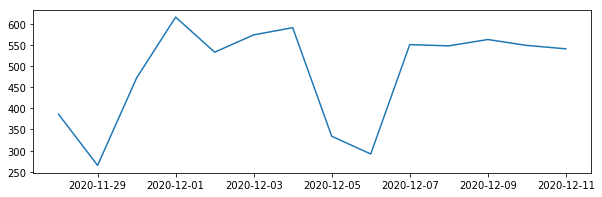

In [237]:
plt.figure(figsize=(10,3))
plt.plot(days, entries)

In [244]:
df2.groupby(["CONVERTED_DATETIME", "STATION COMBO ID"]).agg({"VOLUME": "sum"})

VOLUME
CONVERTED_DATETIME STATION COMBO ID              
2020-11-28         A002R05159 ST             2644
                   A006R0795 AV/59 ST        1693
                   A007R0795 AV/59 ST         798
                   A010R08057 ST-7 AV        2723
                   A011R08057 ST-7 AV        1389
...                                           ...
2020-12-11         S101AR070ST. GEORGE       1519
                   S101R070ST. GEORGE        1429
                   S102R165TOMPKINSVILLE      276
                   TRAM1R468RIT-MANHATTAN    1099
                   TRAM2R469RIT-ROOSEVELT    1211

[10493 rows x 1 columns]

In [261]:
df4 = df2.groupby(["STATION COMBO ID", "CONVERTED_DATETIME"]).agg({"VOLUME": "sum"})
df4.reset_index(inplace=True)
df5 = df4.loc[df4["STATION COMBO ID"] == "A002R05159 ST"]
df5

,STATION COMBO ID,CONVERTED_DATETIME,VOLUME
0,A002R05159 ST,2020-11-28,2644
1,A002R05159 ST,2020-11-29,1957
2,A002R05159 ST,2020-11-30,4057
3,A002R05159 ST,2020-12-01,4556
4,A002R05159 ST,2020-12-02,4540
5,A002R05159 ST,2020-12-03,4543
6,A002R05159 ST,2020-12-04,4508
7,A002R05159 ST,2020-12-05,2422
8,A002R05159 ST,2020-12-06,1988
9,A002R05159 ST,2020-12-07,4338


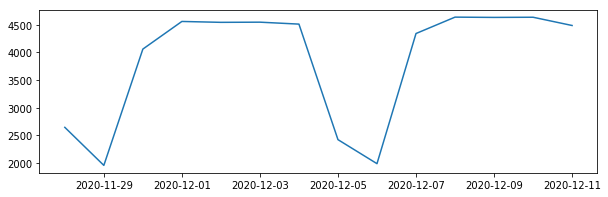

In [263]:
days_station = df5["CONVERTED_DATETIME"]
entries_station = df5["VOLUME"]
plt.figure(figsize=(10,3))
plt.plot(days_station, entries_station)

## 